# Rough Notes for doing things

### Cartopy from Ryan's Research Computing Class 
https://rabernat.github.io/research_computing_2018/maps-with-cartopy.html

In [1]:
import cartopy.crs as ccrs
import cartopy

In [3]:
# instantiate
ccrs.PlateCarree()

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

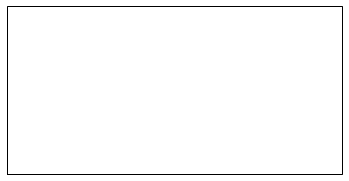

In [5]:
# Cartopy over writes some of the functions of matplotlib
plt.axes(projection=ccrs.PlateCarree())

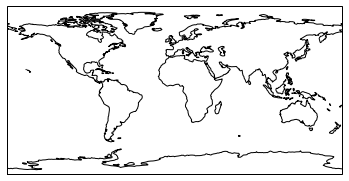

In [6]:
plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()

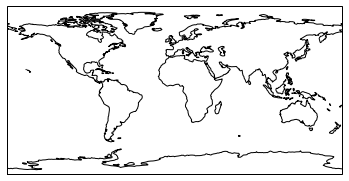

In [7]:
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
ax.coastlines()

In [8]:
ccrs.PlateCarree?

Init signature: ccrs.PlateCarree(central_longitude=0.0, globe=None)
Docstring:     
The abstract class which denotes cylindrical projections where we
want to allow x values to wrap around.
Init docstring:
Parameters
----------
proj4_params: iterable of key-value pairs
    The proj4 parameters required to define the
    desired CRS.  The parameters should not describe
    the desired elliptic model, instead create an
    appropriate Globe instance. The ``proj4_params``
    parameters will override any parameters that the
    Globe defines.
globe: :class:`~cartopy.crs.Globe` instance, optional
    If omitted, the default Globe instance will be created.
    See :class:`~cartopy.crs.Globe` for details.
File:           ~/code/miniconda/envs/sogos/lib/python3.7/site-packages/cartopy/crs.py
Type:           ABCMeta
Subclasses:     


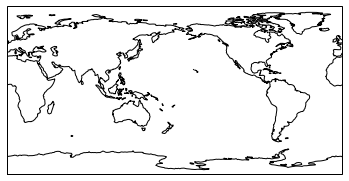

In [9]:
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.coastlines()

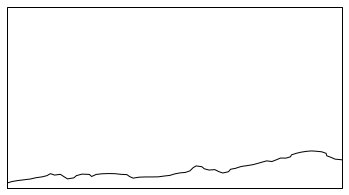

In [10]:

extent = [0, 60, -70, -40]
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
ax.set_extent(extent)
ax.coastlines()

In [11]:
# create some test data
new_york = dict(lon=-74.0060, lat=40.7128)
honolulu = dict(lon=-157.8583, lat=21.3069)
lons = [new_york['lon'], honolulu['lon']]
lats = [new_york['lat'], honolulu['lat']]

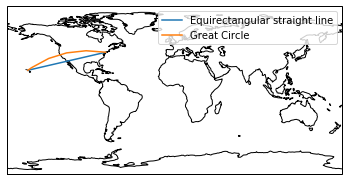

In [12]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.plot(lons, lats, label='Equirectangular straight line')
ax.plot(lons, lats, label='Great Circle', transform=ccrs.Geodetic())
ax.coastlines()
ax.legend()
ax.set_global()

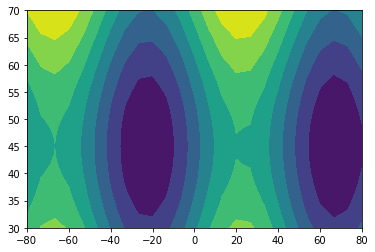

In [13]:
import numpy as np
lon = np.linspace(-80, 80, 25)
lat = np.linspace(30, 70, 25)
lon2d, lat2d = np.meshgrid(lon, lat)
data = np.cos(np.deg2rad(lat2d) * 4) + np.sin(np.deg2rad(lon2d) * 4)
plt.contourf(lon2d, lat2d, data)

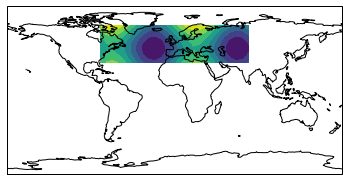

In [17]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
ax.contourf(lon, lat, data,transform=ccrs.PlateCarree())

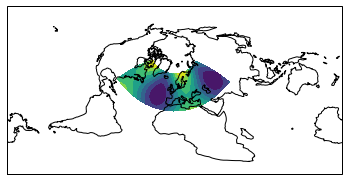

In [18]:
projection = ccrs.RotatedPole(pole_longitude=-177.5, pole_latitude=37.5)
ax = plt.axes(projection=projection)
ax.set_global()
ax.coastlines()
ax.contourf(lon, lat, data, transform=ccrs.PlateCarree())

In [ ]:
## Coarsen ETOPO Data
topo = xr.open_dataset('/Users/dhruvbalwada/work_root/sogos/data/raw/topography/ETOPO1_Ice_g_gmt4.grd')
topo_coarse = topo.coarsen(dim={'x':5,'y':5}, boundary='trim').mean()
topo_coarse.to_netcdf('/Users/dhruvbalwada/work_root/sogos/data/processed/ETOPO1_Ice_g_gmt4_coarsened5.nc')